In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
os.chdir('..')

### 1. Import functions from custom library
We import utility functions from the custom library

In [2]:
from src.data import generate_df_from_list
from src.simulations import simulate_multiple_durations
from src.plot import show_results

### 2. Import data from Yahoo finance
We import the historical time-series of the VTI (Total US stock market) and BND (Total US bond market) total returns, since 2008.

In [3]:
tickers = ["VTI", "BND"]
df = generate_df_from_list(tickers, starting_date="2008-01-01")


yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/Users/user/Desktop/Python projects/Monte-Carlo-PAC/src/data.py:122: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True, method="ffill")


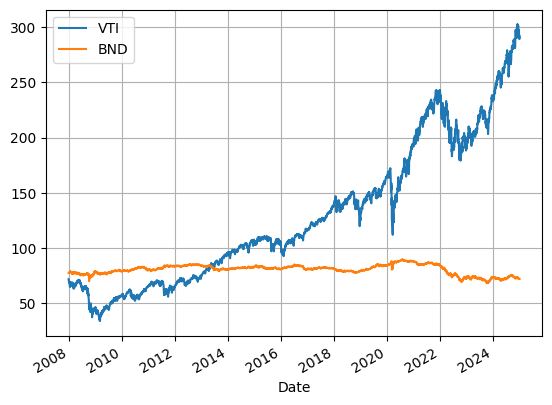

In [4]:
df.plot()
plt.grid()
plt.show()

### 3. Simulate different investments

First, we'll create our portfolio, then we'll simulate different PAC having:
- duration between 1 and 10 years, at intervals of 1 year
- 100 simulations per each duration

In the results are contained (per each duration):
- 1st column, the minimum net return
- 2nd column, the maximum net return
- 3rd column, the median net return
- 4th column, the probability of having a positive return
- 5th column, the probability of having a positive return accounting for the inflation

In [10]:
# define the portfolio composition
my_portfolio = {
    "VTI": 60,  # in percentage
    "BND": 40   # in percentage
    }

years_grid = np.arange(1, 10.1, 1)

results = simulate_multiple_durations(data = df,
                                      years_grid = years_grid,
                                      n_simulations = 100,
                                      portfolio_composition = my_portfolio)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]


In [11]:
print('Shape of results', results.shape)
print(results.shape[0], 'denotes the number of periods considered in the simulations.')
print(results.shape[1], 'denotes the total number of information for each period.')

Shape of results (10, 5)
10 denotes the number of periods considered in the simulations.
5 denotes the total number of information for each period.


### 4. Show results
We show the results of the simulation and we save the figure in the folder `results` with the name `CustomPortfolio.png`.

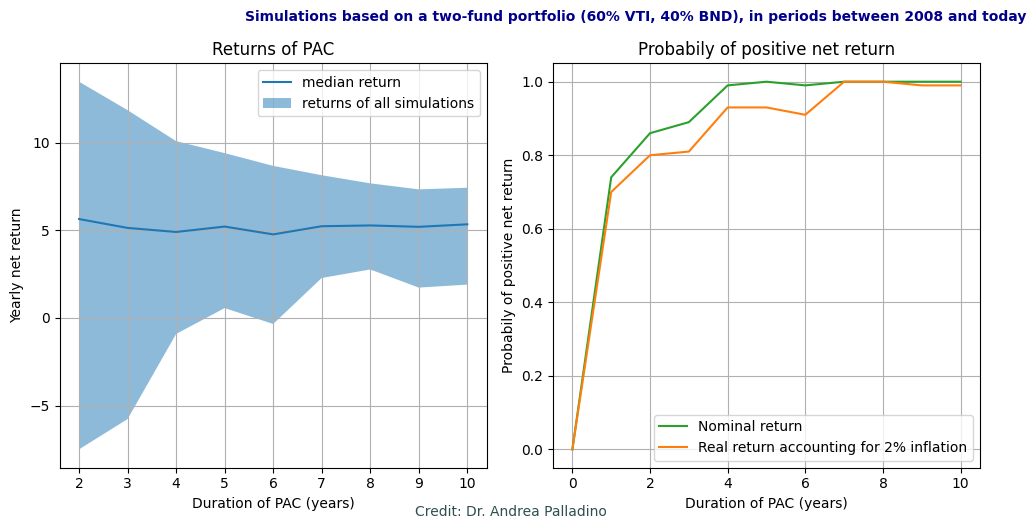

In [12]:
show_results(years_grid,
             results, 
             title="Simulations based on a two-fund portfolio (60% VTI, 40% BND), in periods between 2008 and today",
             save_figure = "results/CustomPortfolio.png")

#